### CMSC 197 - Machine Learning
#### HW 3 -  Submitted by Rica Eunice L. Dordas

In [1]:
# Standard Libraries #

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

# For Processing #
from sklearn.model_selection import train_test_split

# For Building the Model #
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

# For Validation of Model #
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

## 1. Load Advertising.csv dataset 

In [2]:
df = pd.read_csv("Advertising.csv", index_col=0)
df.insert(0, 'bias', [1]*df.shape[0])
df

,bias,TV,Radio,Newspaper,Sales
1,1,230.1,37.8,69.2,22.1
2,1,44.5,39.3,45.1,10.4
3,1,17.2,45.9,69.3,9.3
4,1,151.5,41.3,58.5,18.5
5,1,180.8,10.8,58.4,12.9
...,...,...,...,...,...
196,1,38.2,3.7,13.8,7.6
197,1,94.2,4.9,8.1,9.7
198,1,177.0,9.3,6.4,12.8
199,1,283.6,42.0,66.2,25.5


## 2. Standardize each column of the dataset

In [3]:
TV_mean = df.TV.mean()
Radio_mean = df.Radio.mean()
Newspaper_mean = df.Newspaper.mean()
Sales_mean = df.Sales.mean()

In [4]:
TV_std = df.TV.std()
Radio_std = df.Radio.std()
Newspaper_std = df.Newspaper.std()
Sales_std = df.Sales.std()

### z = (X - μ) / σ 

In [5]:
df['TV'] = (df['TV'] - df.TV.mean()) / df.TV.std()
df['Radio'] = (df['Radio'] - df.Radio.mean()) / df.Radio.std()
df['Newspaper'] = (df['Newspaper'] - df.Newspaper.mean()) / df.Newspaper.std()
df['Sales'] = (df['Sales'] - df.Sales.mean()) / df.Sales.std()
df

,bias,TV,Radio,Newspaper,Sales
1,1,0.967425,0.979066,1.774493,1.548168
2,1,-1.194379,1.080097,0.667903,-0.694304
3,1,-1.512360,1.524637,1.779084,-0.905135
4,1,0.051919,1.214806,1.283185,0.858177
5,1,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...,...
196,1,-1.267759,-1.317724,-0.769287,-1.230964
197,1,-0.615491,-1.236899,-1.031011,-0.828469
198,1,0.348934,-0.940539,-1.109069,-0.234310
199,1,1.590574,1.261955,1.636743,2.199827


In [6]:
x = df.drop("Sales", axis = 1)
y = df["Sales"]

# 4. Divide the dataset into training and testing, with 0.85 and 0.15 ratio

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.85, test_size=0.15, random_state = 42)

In [8]:
print(x_train)

     bias        TV     Radio  Newspaper
10      1  0.614501 -1.391814  -0.429504
19      1 -0.906682 -0.186168  -0.562662
56      1  0.604018  1.760378   1.352060
76      1 -1.515854  1.376457   2.702008
151     1  1.556796 -0.630708   0.295978
..    ...       ...       ...        ...
107     1 -1.421508 -0.826036  -0.039213
15      1  0.664586  0.649028   0.709228
93      1  0.822994  0.689441   1.306143
180     1  0.216151 -0.893391  -0.594804
103     1  1.550972 -0.886655  -0.420320

[170 rows x 4 columns]


In [9]:
print(y_train)

10    -0.655971
19    -0.521806
56     1.854831
76    -1.020133
151    0.398183
         ...   
107   -1.307629
15     0.954009
93     1.030675
180   -0.272642
103    0.149019
Name: Sales, Length: 170, dtype: float64


# 5. Fit the Model

In [10]:
def initialize_weights():
    random.seed(42)
    j0 = random.random()
    j1 = random.random()
    j2 = random.random()
    j3 = random.random()
    init_w = np.array([j0, j1, j2, j3])
    return init_w
initialize_weights()

array([0.6394268 , 0.02501076, 0.27502932, 0.22321074])

In [11]:
def predict(weights, x):
    y_hat = np.sum(np.multiply(weights, x), axis=1)
    return y_hat

In [12]:
def compute_cost(y_hat, y):
    error = y_hat - y
    cost = (np.dot(error.T, error))/(2*y.shape[0])
    return cost

In [13]:
def compute_gradient(y_hat, y, x):
    error = y_hat - y
    par_der = (np.dot(x.T, error)) / y.shape[0]
    return par_der

In [14]:
def update_weights(weights, gradients, l_rate):
    new_weights = weights - (l_rate*gradients)
    return new_weights

In [15]:
def grad_descent(x, y, iterations, l_rate):
    costs_mat = []
    weights_mat = []
    
    init_w = initialize_weights()
    
    for i in range(iterations):
        
        y_hat = predict(init_w, x)
        
        cost = compute_cost(y_hat, y)
        
        gradient = compute_gradient(y_hat, y, x)
        
        init_w = update_weights(init_w, gradient, l_rate)
        
        costs_mat.append(cost)
        weights_mat.append(init_w)
        
    return weights_mat, costs_mat
    
    

# 6. Predict the quantitative response y on the train set

In [16]:
weights, costs = grad_descent(x_train, y_train, 400, 0.01)
y_hat = predict(weights[-1], x_train)
y_hat

10    -0.273256
19    -0.753185
56     1.398663
76    -0.293976
151    0.821591
         ...   
107   -1.441325
15     0.849894
93     1.002043
180   -0.308155
103    0.664952
Length: 170, dtype: float64

In [17]:
compute_cost(y_train, y_hat)

0.051565840303299686

In [18]:
MSE = mean_squared_error(y_train, y_hat)
MSE

0.10313168060659939

# 7. Predict the quantitative response y on the test set

In [19]:
yhat_test = predict(weights[-1], x_test)
yhat_test

96     0.470072
16     1.300851
31     1.433658
159   -0.631528
129    1.491609
116   -0.154292
70     1.315540
171   -1.224558
175   -0.065601
46     0.224963
67    -0.948571
183   -1.363208
166    0.128757
79    -0.974466
187   -0.791314
178   -0.323324
57    -0.979860
153    0.419908
83    -0.690479
69     0.897055
125    1.079206
17    -0.080956
149   -0.334710
94     1.403136
66    -1.167268
61    -1.525468
85     1.264939
68    -0.382423
126   -0.894762
133   -1.052635
dtype: float64

In [20]:
compute_cost(yhat_test, y_test)

0.0555424823646403

In [21]:
MSE = mean_squared_error(y_test, yhat_test)
MSE

0.1110849647292806

# 8. Revert back a standardized data into the original form

In [22]:
new_df = pd.DataFrame()

In [23]:
new_df['TV'] = df['TV'] * TV_std + TV_mean
new_df['Radio'] = df['Radio'] * Radio_std + Radio_mean
new_df['Newspaper'] = df['Newspaper'] * Newspaper_std + Newspaper_mean
new_df['Sales'] = df['Sales'] * Sales_std + Sales_mean
new_df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [24]:
x_new = new_df.drop('Sales', axis=1)
y_new = df["Sales"]

In [25]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, train_size=0.85, test_size=0.15, random_state = 42)

In [26]:
y_hat_new = predict(weights[-1], x_train_new)
y_hat_new

10    -0.273256
19    -0.753185
56     1.398663
76    -0.293976
151    0.821591
         ...   
107   -1.441325
15     0.849894
93     1.002043
180   -0.308155
103    0.664952
Length: 170, dtype: float64

In [27]:
compute_cost(y_hat_new, y_train_new)

0.051565840303299686

# QUESTION

##### 1. What are the optimal weights found by your implemented gradient descent? 

In [28]:
weights[-1]

array([0.01414984, 0.7227366 , 0.51692293, 0.02809588])

##### The optimal weights found by the function gradient descent are 0.01414984, 0.7227366 , 0.51692293, 0.02809588.

#### Plug it into the linear model:

hθ(x) = 0.01414984 + 0.7227366 (TV) + 0.51692293 (Radio) + 0.02809588 (Newspaper)

#### What are your interpretations regarding the formed linear model?

The impact on sales of the objects vary on their weights. Since TV has the biggest weight (0.7227366), it has the greatest impact on sales. It is followed by Radio (0.51692293), and the object with the least impact is Newspaper (0.02809588).

#### 2. Provide a scatter plot of the y_hat and y for both the train and test set. Is there a trend? 

<AxesSubplot:title={'center':'Train Set: Predicted Sales vs Actual Sales'}, ylabel='Sales'>

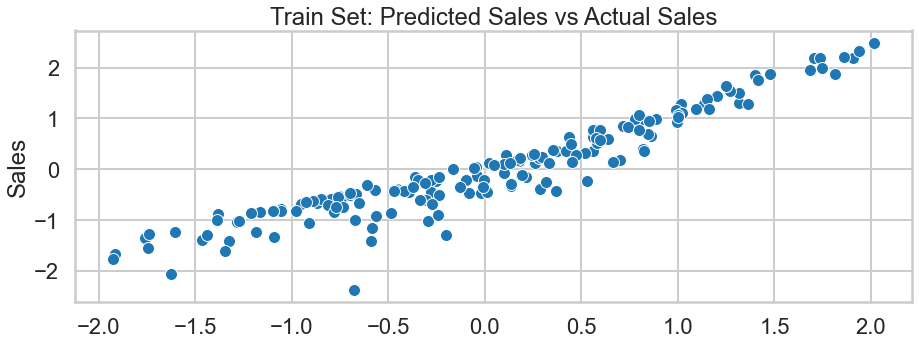

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title("Train Set: Predicted Sales vs Actual Sales")
sns.scatterplot(x=y_hat, y=y_train, ax=ax)

#### Provide an r2 score (also available in sklearn).

In [30]:
r2_score(y_train, y_hat)

0.892667168857797

<AxesSubplot:title={'center':'Test Set: Predicted Sales vs Actual Sales'}, ylabel='Sales'>

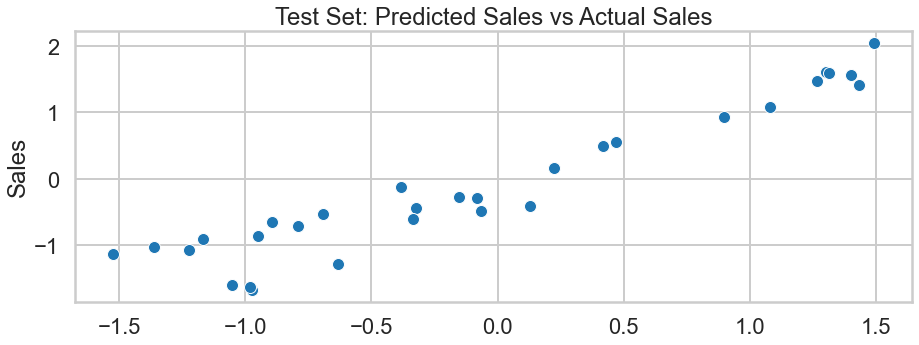

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title("Test Set: Predicted Sales vs Actual Sales")
sns.scatterplot(x=yhat_test, y=y_test, ax=ax)

In [32]:
r2_score(y_test, yhat_test)

0.9057328737703467

###### The first table shows the train set while the second table shows the test set of the predicted sales vs the actual sales. Both train and test set indicate that as the actual sales increases the predicted sales also increases. Also, the data are close to each other which are also closer towards the regression. With this, it concludes that it is a good model to predict the sales.

#### 3. What happens to the error, r2, and cost as the number of iterations increase? Show yourdata and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

In [ ]:
weights, costs = grad_descent(x_train, y_train, 50000, 0.01)

#### 4. Once you determine the optimal number of iterations, check the effect on the cost anderror as you change the learning rate. The common learning rates in machine learninginclude 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. 

#### Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.


#### 5. Is there a relationship on the learning rate and the number of iterations?

Based on the relationship of learning rate and the number of iterations, as the learning is lower, it will require more number of iterations in order to have a lower cost function. With this, it will take up more time since there will be more iterations. This is why it is important to get the optimal learning rate in order to have the decent amount of iterations wherein it will not take up too much time and cost.

Reference: https://www.mygreatlearning.com/blog/understanding-learning-rate-in-machine-learning/#:~:text=If%20the%20learning%20rate%20used,higher%20than%20the%20minimum%20value.

#### 6. Compare the results with the results of ordinary least squares function

In [ ]:
R2_OLS = LinearRegression().fit(x_train, y_train).score(x_train, y_train)
R2_Scratch = r2_score(y_test,yhat_test)

print("R2 of OLS: ", R2_OLS)
print("R2 of Scratch: ", R2_Scratch)

#### R2 scores are used in order to compare the results of ordinary least squares function and the one made from scratch code. An r-squared score indicates how well the data are fits in a regression line. Since the R2 score of the scratch code is higher than the ordinary least squares function, the data are a bit closer to the regression line.